# Благотворительная больница

**Описание проекта:** Клиент АНО медико-социальной помощи «Благотворительная больница» оказывает медико-социальную помощь бездомным людям Петербурга с 2018 года. Заказчики уже долгое время сотрудничают с Мастерской Практикума в направлении маркетинга и предоставили нам все имеющиеся данные с просьбой извлечь из них максимум пользы.

**Цель проекта:** проанализировать эффективность маркетингового подхода на основе данных о пожертвованиях и рекламных кампаниях.

**Ход исследования:**  
1. Загрузка и подготовка данных
- Загрузка и изучение данных
- Переименование столбцов
- Объединение данных
- Удаление дубликатов
- Удаление лишних или пустых колонок
- Преобразование типов данных
- Обработка пропусков
2. Анализ данных
- Клиенты
- Конверсия
- Анализ рекламных кампаний
3. Выводы и рекомендации
4. Презентация

**Описание данных:**   

`clients` - это таблица, выкачанная с использованием сервиса Mixplat  
`donors` - это таблица доноров, которые сделали пожертвование через сайт charityhospital.ru. Там стоит специальный плагин, он называется Лейка - он позволяет внедрять специальные формы для пожертвований, которые объединяют в себе большое количество разных вариантов осуществить оплату.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

%matplotlib inline

In [2]:
adgrants_first = pd.read_csv('C:/Users/petrd/Downloads/больничка/2022-07-19_2023-07-19_adgrants-charityhospital (1).csv', sep=';', nrows=2)
adgrants_first.head()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"Клиент АНО медико-социальной помощи «Благотворительная больница» (adgrants-charityhospital), период 19.07.2022 - 19.07.2023"
Всего,NaN,Ср.расход за день (руб.),Показы,Взвешенные показы,Клики,CTR (%),wCTR (%),Расход (руб.),Ср. цена клика (руб.),Ср. ставка за клик (руб.),Ср. позиция показов,Ср. объём трафика,Ср. позиция кликов,Отказы (%),Ср. цена тыс. показов (руб.),Глубина (стр.),Конверсия (%),Цена цели (руб.),Конверсии,Рентабельность,Доля рекламных расходов,Доход (руб.),Прибыль (руб.),Сумма ВC,Цена ВC (руб.),Доля ВC (%),Проигрывание 25% ролика,Проигрывание 50% ролика,Проигрывание 75% ролика,Проигрывание 100% ролика,Доля проигрываний 25% ролика (%),Доля проигрываний 50% ролика (%),Доля проигрываний 75% ролика (%),Доля проигрываний 100% ролика (%),Ср. цена досмотра 100% ролика (руб.),"Видимые показы, стандарт MRC","Невидимые показы, стандарт MRC","Неустановленные показы, стандарт MRC","Доля измеряемых показов, стандарт MRC (%)","Доля видимых показов, стандарт MRC (%)"
с 19.07.2022 по 19.07.2023,NaN,"5468,02",9853586,"9853586,00",41243,"0,42","0,42","825670,64","20,02","29,15",-,"100,00",-,"37,05","83,79","1,21","1,19","1678,19",492,"-0,20","124,61","662600,00","-163070,64","112,55","7336,19","0,27",117682,83308,69513,62947,"1,19","0,85","0,71","0,64","13,1169",7348,11157,0,"100,00","39,71"


In [3]:
adgrants_last = pd.read_csv('C:/Users/petrd/Downloads/больничка/2022-07-19_2023-07-19_adgrants-charityhospital (1).csv', sep=';', skiprows=4)
adgrants_last.head()

,Дата,Кампания,№ Кампании,Метка,Условие показа,Пол,Уровень платежеспособности,Возраст,Показы,Взвешенные показы,...,Доля проигрываний 25% ролика (%),Доля проигрываний 50% ролика (%),Доля проигрываний 75% ролика (%),Доля проигрываний 100% ролика (%),Ср. цена досмотра 100% ролика (руб.),"Видимые показы, стандарт MRC","Невидимые показы, стандарт MRC","Неустановленные показы, стандарт MRC","Доля измеряемых показов, стандарт MRC (%)","Доля видимых показов, стандарт MRC (%)"
0,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,не определен,7,"7,00",...,-,-,-,-,-,-,-,-,-,-
1,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,младше 18,4,"4,00",...,-,-,-,-,-,-,-,-,-,-
2,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,18-24,2,"2,00",...,-,-,-,-,-,-,-,-,-,-
3,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,25-34,1,"1,00",...,-,-,-,-,-,-,-,-,-,-
4,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,35-44,1,"1,00",...,-,-,-,-,-,-,-,-,-,-


In [4]:
clients = pd.read_excel('C:/Users/petrd/Downloads/больничка/clients.xlsx')
clients.head()

,id,Первый платеж,Подписки вкл,Подписки выкл,Типы оплаты,Платежей за год,Сумма за год,Средний платеж в год,Всего платежей,Сумма всего,Средний платеж,Сумма за месяц,Страны,Регионы,Последний платеж,код
0,707634,2021-12-28 16:54:52,0,0,карта,0,0,0,0,0,0,0,NaN,NaN,2021-12-28 16:54:52,1118
1,789437,2022-03-12 00:16:40,0,0,карта,0,0,0,0,0,0,0,NaN,NaN,2022-03-12 00:16:40,1119
2,1078426,2022-11-23 12:55:04,0,0,NaN,0,0,0,0,0,0,0,NaN,NaN,2022-11-23 12:55:04,1120
3,1078667,2022-11-23 16:28:46,0,0,NaN,1,500,500,1,500,500,0,Россия,Ленинградская обл.,2022-11-23 16:28:46,1121
4,708416,2021-12-29 17:04:26,0,0,карта,1,1000,1000,1,1000,1000,0,Россия,Кунене,2021-12-29 17:04:26,1122


In [5]:
donors = pd.read_excel('C:/Users/petrd/Downloads/больничка/donors (1).xlsx')
donors.head()

,ID,Тип донора,Дата первого пожертвования,Сумма первого пожертвования,Кампания первого пожертвования,Метки донора,Кампании,Платёжные операторы,Дата последнего пожертвования,Сумма последнего пожертвования,Кампания последнего пожертвования,Общая сумма пожертвований,Валюта,Код
0,833,разовый,"21.06.2023, 18:43",3000.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"21.06.2023, 18:43",3000.0,На уставную деятельность и содержание организации,3000,₽,2285
1,832,постоянный,"20.06.2023, 16:36",500.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"20.06.2023, 16:40",500.0,На уставную деятельность и содержание организации,500,₽,2286
2,831,постоянный,"20.06.2023, 10:39",500.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"20.06.2023, 10:39",500.0,На уставную деятельность и содержание организации,500,₽,1479
3,830,разовый,"20.06.2023, 09:09",1000.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"20.06.2023, 09:09",1000.0,На уставную деятельность и содержание организации,1000,₽,2288
4,829,постоянный,"19.06.2023, 23:03",100.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"19.06.2023, 23:03",100.0,На уставную деятельность и содержание организации,100,₽,2289


## Предобработка данных

### Датасет `adgrants`

In [6]:
adgrants_first

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"Клиент АНО медико-социальной помощи «Благотворительная больница» (adgrants-charityhospital), период 19.07.2022 - 19.07.2023"
Всего,NaN,Ср.расход за день (руб.),Показы,Взвешенные показы,Клики,CTR (%),wCTR (%),Расход (руб.),Ср. цена клика (руб.),Ср. ставка за клик (руб.),Ср. позиция показов,Ср. объём трафика,Ср. позиция кликов,Отказы (%),Ср. цена тыс. показов (руб.),Глубина (стр.),Конверсия (%),Цена цели (руб.),Конверсии,Рентабельность,Доля рекламных расходов,Доход (руб.),Прибыль (руб.),Сумма ВC,Цена ВC (руб.),Доля ВC (%),Проигрывание 25% ролика,Проигрывание 50% ролика,Проигрывание 75% ролика,Проигрывание 100% ролика,Доля проигрываний 25% ролика (%),Доля проигрываний 50% ролика (%),Доля проигрываний 75% ролика (%),Доля проигрываний 100% ролика (%),Ср. цена досмотра 100% ролика (руб.),"Видимые показы, стандарт MRC","Невидимые показы, стандарт MRC","Неустановленные показы, стандарт MRC","Доля измеряемых показов, стандарт MRC (%)","Доля видимых показов, стандарт MRC (%)"
с 19.07.2022 по 19.07.2023,NaN,"5468,02",9853586,"9853586,00",41243,"0,42","0,42","825670,64","20,02","29,15",-,"100,00",-,"37,05","83,79","1,21","1,19","1678,19",492,"-0,20","124,61","662600,00","-163070,64","112,55","7336,19","0,27",117682,83308,69513,62947,"1,19","0,85","0,71","0,64","13,1169",7348,11157,0,"100,00","39,71"


In [7]:
#меняем названия столбцов
adgrants_last.columns = adgrants_last.columns.str.lower().str.replace(' ', '_')

In [8]:
#пропущенные значения
adgrants_last.isnull().sum().sort_values()

дата                                         0
рентабельность                               0
доля_рекламных_расходов                      0
доход_(руб.)                                 0
прибыль_(руб.)                               0
сумма_вc                                     0
цена_вc_(руб.)                               0
доля_вc_(%)                                  0
проигрывание_25%_ролика                      0
проигрывание_50%_ролика                      0
проигрывание_75%_ролика                      0
проигрывание_100%_ролика                     0
доля_проигрываний_25%_ролика_(%)             0
доля_проигрываний_50%_ролика_(%)             0
доля_проигрываний_75%_ролика_(%)             0
доля_проигрываний_100%_ролика_(%)            0
ср._цена_досмотра_100%_ролика_(руб.)         0
видимые_показы,_стандарт_mrc                 0
невидимые_показы,_стандарт_mrc               0
неустановленные_показы,_стандарт_mrc         0
конверсии                                    0
цена_цели_(ру

`wCTR` = `Взвешенные показы` — это показы, скорректированные на объем трафика. То есть вес каждого показа определяется с учетом объема трафика позиции, на которой показывалось объявление. Чем больше объем трафика, тем выше вес показа.  
`сумма_вс` - Совокупная оценка конверсионности визитов из Директа. Показатель отражает заинтересованность в товаре или услуге пользователей, кликнувших по объявлению.  
`цена_вс` - Усредненная стоимость конверсии, отношение расходов на рекламу к оценке конверсионности визитов (Расход/Сумма ВС).  
`доля_вс` - Эффективность конверсии, отношение оценки конверсионности визитов к общему количеству переходов по рекламе (Сумма ВС/Клики × 100%).  
`видимые_показы, _стандарт_mrc` По стандарту IAB/MRC показ баннера считается видимым, если не менее 50% рекламного креатива находилось в видимой области активной вкладки в течение как минимум одной секунды, для видео — в течение двух секунд.  


In [9]:
adgrants_last.drop_duplicates().reset_index(drop= True, inplace=True)

In [10]:
adgrants_last['условие_показа'].unique()

array(['благотворительность', 'благотворительный фонд', 'волонтер года',
       ..., 'веганский магазин -спб', 'буддийский -храм -центр',
       'йога спб'], dtype=object)

In [11]:
adgrants_last['метка'].unique()

array(['без метки'], dtype=object)

In [12]:
#можем удалить колонку, так как она пустая
adgrants_last.drop('метка', axis= 1 , inplace= True )

In [13]:
adgrants_last['№_кампании'].unique()

array([82164908, 83825936, 84171252, 84173536, 84199193, 84641858,
       84707741, 84716344, 84721444, 84725588, 84176025, 84668594,
       84724307, 84728956, 84755241, 84704851, 86413952, 86427768,
       86426984, 87637100, 89800500, 89727699, 89785325, 90807175],
      dtype=int64)

In [14]:
adgrants_last['возраст'].unique()

array(['не определен', 'младше 18', '18-24', '25-34', '35-44',
       'старше 55', '45-54'], dtype=object)

In [15]:
adgrants_last.dtypes

дата                                         object
кампания                                     object
№_кампании                                    int64
условие_показа                               object
пол                                          object
уровень_платежеспособности                   object
возраст                                      object
показы                                        int64
взвешенные_показы                            object
клики                                         int64
ctr_(%)                                      object
wctr_(%)                                     object
расход_(руб.)                                object
ср._цена_клика_(руб.)                        object
ср._ставка_за_клик_(руб.)                    object
ср._позиция_показов                          object
ср._объём_трафика                            object
ср._позиция_кликов                           object
отказы_(%)                                   object
ср._цена_тыс

In [16]:
adgrants_last['дата']=pd.to_datetime(adgrants_last['дата'], format='%d.%m.%Y')

In [17]:
adgrants_last.dtypes

дата                                         datetime64[ns]
кампания                                             object
№_кампании                                            int64
условие_показа                                       object
пол                                                  object
уровень_платежеспособности                           object
возраст                                              object
показы                                                int64
взвешенные_показы                                    object
клики                                                 int64
ctr_(%)                                              object
wctr_(%)                                             object
расход_(руб.)                                        object
ср._цена_клика_(руб.)                                object
ср._ставка_за_клик_(руб.)                            object
ср._позиция_показов                                  object
ср._объём_трафика                       

### Датасет `clients`

In [18]:
clients

,id,Первый платеж,Подписки вкл,Подписки выкл,Типы оплаты,Платежей за год,Сумма за год,Средний платеж в год,Всего платежей,Сумма всего,Средний платеж,Сумма за месяц,Страны,Регионы,Последний платеж,код
0,707634,2021-12-28 16:54:52,0,0,карта,0,0,0,0,0,0,0,NaN,NaN,2021-12-28 16:54:52,1118
1,789437,2022-03-12 00:16:40,0,0,карта,0,0,0,0,0,0,0,NaN,NaN,2022-03-12 00:16:40,1119
2,1078426,2022-11-23 12:55:04,0,0,NaN,0,0,0,0,0,0,0,NaN,NaN,2022-11-23 12:55:04,1120
3,1078667,2022-11-23 16:28:46,0,0,NaN,1,500,500,1,500,500,0,Россия,Ленинградская обл.,2022-11-23 16:28:46,1121
4,708416,2021-12-29 17:04:26,0,0,карта,1,1000,1000,1,1000,1000,0,Россия,Кунене,2021-12-29 17:04:26,1122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,1498729,2023-05-31 15:36:27,1,0,карта,1,200,200,1,200,200,0,Франция,Бургундия — Франш-Конте,2023-05-31 15:36:27,2279
1162,1499774,2023-06-01 09:50:18,1,0,"карта,терм,СБП",3,110,36.66,3,110,36.66,0,Нидерланды\nРоссия,Северная Голландия\nСанкт-Петербург,2023-06-01 12:46:51,2280
1163,1155976,2023-01-01 14:07:53,1,0,карта,6,3000,500,6,3000,500,0,Россия,Санкт-Петербург,2023-06-01 14:07:53,2281
1164,1152171,2022-12-29 21:43:35,1,0,карта,6,1200,200,6,1200,200,0,Нидерланды,Южная Голландия,2023-06-01 21:43:37,2282


In [19]:
#меняем названия столбцов
clients.columns = clients.columns.str.lower().str.replace(' ', '_')

In [20]:
clients.dtypes

id                               int64
первый_платеж           datetime64[ns]
подписки_вкл                     int64
подписки_выкл                    int64
типы_оплаты                     object
платежей_за_год                  int64
сумма_за_год                     int64
средний_платеж_в_год            object
всего_платежей                   int64
сумма_всего                      int64
средний_платеж                  object
сумма_за_месяц                   int64
страны                          object
регионы                         object
последний_платеж        datetime64[ns]
код                              int64
dtype: object

In [21]:
clients

,id,первый_платеж,подписки_вкл,подписки_выкл,типы_оплаты,платежей_за_год,сумма_за_год,средний_платеж_в_год,всего_платежей,сумма_всего,средний_платеж,сумма_за_месяц,страны,регионы,последний_платеж,код
0,707634,2021-12-28 16:54:52,0,0,карта,0,0,0,0,0,0,0,NaN,NaN,2021-12-28 16:54:52,1118
1,789437,2022-03-12 00:16:40,0,0,карта,0,0,0,0,0,0,0,NaN,NaN,2022-03-12 00:16:40,1119
2,1078426,2022-11-23 12:55:04,0,0,NaN,0,0,0,0,0,0,0,NaN,NaN,2022-11-23 12:55:04,1120
3,1078667,2022-11-23 16:28:46,0,0,NaN,1,500,500,1,500,500,0,Россия,Ленинградская обл.,2022-11-23 16:28:46,1121
4,708416,2021-12-29 17:04:26,0,0,карта,1,1000,1000,1,1000,1000,0,Россия,Кунене,2021-12-29 17:04:26,1122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,1498729,2023-05-31 15:36:27,1,0,карта,1,200,200,1,200,200,0,Франция,Бургундия — Франш-Конте,2023-05-31 15:36:27,2279
1162,1499774,2023-06-01 09:50:18,1,0,"карта,терм,СБП",3,110,36.66,3,110,36.66,0,Нидерланды\nРоссия,Северная Голландия\nСанкт-Петербург,2023-06-01 12:46:51,2280
1163,1155976,2023-01-01 14:07:53,1,0,карта,6,3000,500,6,3000,500,0,Россия,Санкт-Петербург,2023-06-01 14:07:53,2281
1164,1152171,2022-12-29 21:43:35,1,0,карта,6,1200,200,6,1200,200,0,Нидерланды,Южная Голландия,2023-06-01 21:43:37,2282


In [22]:
clients = clients.rename( 
 columns={ 
'первый_платеж': 'дата_первого_пожертвования', 
'последний_платеж': 'дата_последнего_пожертвования', 
'сумма_всего': 'общая_сумма_пожертвований', 
 } 
)

In [23]:
clients['типы_оплаты'].unique()

array(['карта', nan, 'sms,карта', 'терм,СБП', 'sms', 'карта,терм,СБП',
       'sms,карта,терм,СБП', 'sms,терм,СБП'], dtype=object)

In [24]:
clients['страны'].unique()

array([nan, 'Россия', 'Нидерланды\nРоссия\nСША', 'Россия\nСША',
       'Нидерланды', 'Чехия', 'Белоруссия', 'США', 'Латвия', 'Грузия',
       'Швеция', 'Сингапур', 'Латвия\nРоссия', 'Германия',
       'США\nФинляндия', 'Россия\nСербия\nСША', 'Финляндия', 'Венгрия',
       'Нидерланды\nРоссия', 'Франция', 'Армения', 'Канада', 'ОАЭ',
       'Литва', 'Германия\nРоссия', 'Россия\nЭстония', 'Турция',
       'Швейцария', 'Вьетнам', 'Греция\nРоссия\nСША', 'Испания',
       'Казахстан', 'Румыния', 'Великобритания',
       'Нидерланды\nРоссия\nФинляндия', 'Киргизия', 'Сербия', 'Польша',
       'Монголия', 'Россия\nВеликобритания', 'Дания\nРоссия\nСША',
       'США\nТурция', 'США\nЭстония', 'Болгария\nКазахстан', 'Эстония',
       'Кипр', 'Шри-Ланка', 'Италия', 'Австрия', 'Аргентина', 'Бельгия',
       'Япония', 'Израиль', 'Португалия', 'ндия Индия', 'Россия\nТаиланд',
       'Германия\nСША', 'Россия\nШвейцария', 'ОАЭ\nЭстония', 'Таиланд',
       'Белоруссия\nРоссия', 'Германия\nНидерланды\nРосс

In [25]:
clients.duplicated().sum()

0

In [26]:
clients.isna().sum()

id                                 0
дата_первого_пожертвования         0
подписки_вкл                       0
подписки_выкл                      0
типы_оплаты                      168
платежей_за_год                    0
сумма_за_год                       0
средний_платеж_в_год               0
всего_платежей                     0
общая_сумма_пожертвований          0
средний_платеж                     0
сумма_за_месяц                     0
страны                           244
регионы                          270
дата_последнего_пожертвования      0
код                                0
dtype: int64

In [27]:
clients

,id,дата_первого_пожертвования,подписки_вкл,подписки_выкл,типы_оплаты,платежей_за_год,сумма_за_год,средний_платеж_в_год,всего_платежей,общая_сумма_пожертвований,средний_платеж,сумма_за_месяц,страны,регионы,дата_последнего_пожертвования,код
0,707634,2021-12-28 16:54:52,0,0,карта,0,0,0,0,0,0,0,NaN,NaN,2021-12-28 16:54:52,1118
1,789437,2022-03-12 00:16:40,0,0,карта,0,0,0,0,0,0,0,NaN,NaN,2022-03-12 00:16:40,1119
2,1078426,2022-11-23 12:55:04,0,0,NaN,0,0,0,0,0,0,0,NaN,NaN,2022-11-23 12:55:04,1120
3,1078667,2022-11-23 16:28:46,0,0,NaN,1,500,500,1,500,500,0,Россия,Ленинградская обл.,2022-11-23 16:28:46,1121
4,708416,2021-12-29 17:04:26,0,0,карта,1,1000,1000,1,1000,1000,0,Россия,Кунене,2021-12-29 17:04:26,1122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,1498729,2023-05-31 15:36:27,1,0,карта,1,200,200,1,200,200,0,Франция,Бургундия — Франш-Конте,2023-05-31 15:36:27,2279
1162,1499774,2023-06-01 09:50:18,1,0,"карта,терм,СБП",3,110,36.66,3,110,36.66,0,Нидерланды\nРоссия,Северная Голландия\nСанкт-Петербург,2023-06-01 12:46:51,2280
1163,1155976,2023-01-01 14:07:53,1,0,карта,6,3000,500,6,3000,500,0,Россия,Санкт-Петербург,2023-06-01 14:07:53,2281
1164,1152171,2022-12-29 21:43:35,1,0,карта,6,1200,200,6,1200,200,0,Нидерланды,Южная Голландия,2023-06-01 21:43:37,2282


### Датасет `donors`

In [28]:
donors

,ID,Тип донора,Дата первого пожертвования,Сумма первого пожертвования,Кампания первого пожертвования,Метки донора,Кампании,Платёжные операторы,Дата последнего пожертвования,Сумма последнего пожертвования,Кампания последнего пожертвования,Общая сумма пожертвований,Валюта,Код
0,833,разовый,"21.06.2023, 18:43",3000.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"21.06.2023, 18:43",3000.0,На уставную деятельность и содержание организации,3000,₽,2285
1,832,постоянный,"20.06.2023, 16:36",500.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"20.06.2023, 16:40",500.0,На уставную деятельность и содержание организации,500,₽,2286
2,831,постоянный,"20.06.2023, 10:39",500.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"20.06.2023, 10:39",500.0,На уставную деятельность и содержание организации,500,₽,1479
3,830,разовый,"20.06.2023, 09:09",1000.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"20.06.2023, 09:09",1000.0,На уставную деятельность и содержание организации,1000,₽,2288
4,829,постоянный,"19.06.2023, 23:03",100.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"19.06.2023, 23:03",100.0,На уставную деятельность и содержание организации,100,₽,2289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,16,постоянный,"18.08.2022, 14:38",55.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"18.08.2022, 14:38",55.0,На уставную деятельность и содержание организации,55,₽,1513
809,15,разовый,"18.02.2023, 14:32",50.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"18.06.2023, 14:31",50.0,На уставную деятельность и содержание организации,250,₽,3094
810,14,постоянный,"12.08.2022, 17:05",50.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"23.11.2022, 11:24",50.0,На уставную деятельность и содержание организации,151,₽,1509
811,13,постоянный,"17.08.2022, 23:21",50.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"17.12.2022, 23:22",50.0,На уставную деятельность и содержание организации,405,₽,1512


In [29]:
#меняем названия столбцов
donors.columns = donors.columns.str.lower().str.replace(' ', '_')

In [30]:
donors

,id,тип_донора,дата_первого_пожертвования,сумма_первого_пожертвования,кампания_первого_пожертвования,метки_донора,кампании,платёжные_операторы,дата_последнего_пожертвования,сумма_последнего_пожертвования,кампания_последнего_пожертвования,общая_сумма_пожертвований,валюта,код
0,833,разовый,"21.06.2023, 18:43",3000.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"21.06.2023, 18:43",3000.0,На уставную деятельность и содержание организации,3000,₽,2285
1,832,постоянный,"20.06.2023, 16:36",500.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"20.06.2023, 16:40",500.0,На уставную деятельность и содержание организации,500,₽,2286
2,831,постоянный,"20.06.2023, 10:39",500.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"20.06.2023, 10:39",500.0,На уставную деятельность и содержание организации,500,₽,1479
3,830,разовый,"20.06.2023, 09:09",1000.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"20.06.2023, 09:09",1000.0,На уставную деятельность и содержание организации,1000,₽,2288
4,829,постоянный,"19.06.2023, 23:03",100.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"19.06.2023, 23:03",100.0,На уставную деятельность и содержание организации,100,₽,2289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,16,постоянный,"18.08.2022, 14:38",55.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"18.08.2022, 14:38",55.0,На уставную деятельность и содержание организации,55,₽,1513
809,15,разовый,"18.02.2023, 14:32",50.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"18.06.2023, 14:31",50.0,На уставную деятельность и содержание организации,250,₽,3094
810,14,постоянный,"12.08.2022, 17:05",50.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"23.11.2022, 11:24",50.0,На уставную деятельность и содержание организации,151,₽,1509
811,13,постоянный,"17.08.2022, 23:21",50.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"17.12.2022, 23:22",50.0,На уставную деятельность и содержание организации,405,₽,1512


In [31]:
donors.dtypes

id                                     int64
тип_донора                            object
дата_первого_пожертвования            object
сумма_первого_пожертвования          float64
кампания_первого_пожертвования        object
метки_донора                         float64
кампании                              object
платёжные_операторы                   object
дата_последнего_пожертвования         object
сумма_последнего_пожертвования       float64
кампания_последнего_пожертвования     object
общая_сумма_пожертвований              int64
валюта                                object
код                                    int64
dtype: object

In [32]:
donors['дата_первого_пожертвования']= pd.to_datetime(donors['дата_первого_пожертвования'], format='%d.%m.%Y, %H:%M')

In [33]:
donors['дата_последнего_пожертвования']= pd.to_datetime(donors['дата_последнего_пожертвования'], format='%d.%m.%Y, %H:%M')

In [34]:
donors['метки_донора'].unique()

array([nan])

In [35]:
#можем удалить колонку, так как она пустая
donors.drop('метки_донора', axis= 1 , inplace= True )

In [36]:
donors['тип_донора'].unique()

array(['разовый', 'постоянный'], dtype=object)

In [37]:
donors['кампания_первого_пожертвования'].unique()

array(['На уставную деятельность и содержание организации', nan,
       '#Больничкабежит'], dtype=object)

In [38]:
donors['кампания_последнего_пожертвования'].unique()

array(['На уставную деятельность и содержание организации', nan,
       '#Больничкабежит'], dtype=object)

In [39]:
donors['кампании'].unique()

array(['На уставную деятельность и содержание организации', nan,
       '#Больничкабежит',
       '#Больничкабежит, На уставную деятельность и содержание организации'],
      dtype=object)

In [40]:
#как я поняла столбцы - кампании, кампания_первого_пожертвования, кампания_последнего_пожертвования не влияют на рекламную кампанию, поэтому принимаю решени удалить их
donors.drop(['кампания_первого_пожертвования','кампания_последнего_пожертвования','кампании' ], axis= 1 , inplace= True )

In [41]:
donors['валюта'].unique()

array(['₽'], dtype=object)

In [42]:
#валюта только рубли, так что можно удалить этот столбец
donors.drop('валюта', axis= 1 , inplace= True )

In [43]:
#хочу переименовать столбец с платежными операторами на типы оплат, для дальнейшего объединения с датасетом clients
donors = donors.rename( 
 columns={ 
'платёжные_операторы': 'типы_оплаты', 
}) 

In [44]:
#проверим на явные дубликаты
donors.duplicated().sum()

0

In [45]:
for col in donors.columns:
    missing_data = np.mean(donors[col].isnull())
    print('доля пропусков в столбце {} - {}%'.format(col, round(missing_data*100)))

доля пропусков в столбце id - 0%
доля пропусков в столбце тип_донора - 0%
доля пропусков в столбце дата_первого_пожертвования - 2%
доля пропусков в столбце сумма_первого_пожертвования - 2%
доля пропусков в столбце типы_оплаты - 2%
доля пропусков в столбце дата_последнего_пожертвования - 2%
доля пропусков в столбце сумма_последнего_пожертвования - 2%
доля пропусков в столбце общая_сумма_пожертвований - 0%
доля пропусков в столбце код - 0%


In [46]:
#доля пропусков составляет всего лишь 2% можем удалить
donors = donors.dropna() 

In [47]:
donors

,id,тип_донора,дата_первого_пожертвования,сумма_первого_пожертвования,типы_оплаты,дата_последнего_пожертвования,сумма_последнего_пожертвования,общая_сумма_пожертвований,код
0,833,разовый,2023-06-21 18:43:00,3000.0,MIXPLAT,2023-06-21 18:43:00,3000.0,3000,2285
1,832,постоянный,2023-06-20 16:36:00,500.0,MIXPLAT,2023-06-20 16:40:00,500.0,500,2286
2,831,постоянный,2023-06-20 10:39:00,500.0,MIXPLAT,2023-06-20 10:39:00,500.0,500,1479
3,830,разовый,2023-06-20 09:09:00,1000.0,MIXPLAT,2023-06-20 09:09:00,1000.0,1000,2288
4,829,постоянный,2023-06-19 23:03:00,100.0,MIXPLAT,2023-06-19 23:03:00,100.0,100,2289
...,...,...,...,...,...,...,...,...,...
808,16,постоянный,2022-08-18 14:38:00,55.0,MIXPLAT,2022-08-18 14:38:00,55.0,55,1513
809,15,разовый,2023-02-18 14:32:00,50.0,MIXPLAT,2023-06-18 14:31:00,50.0,250,3094
810,14,постоянный,2022-08-12 17:05:00,50.0,MIXPLAT,2022-11-23 11:24:00,50.0,151,1509
811,13,постоянный,2022-08-17 23:21:00,50.0,MIXPLAT,2022-12-17 23:22:00,50.0,405,1512


## Анализ данных

In [48]:
print('Минимальная сумма пожертвований через платформу mixplat:',donors['общая_сумма_пожертвований'].min())
print('Максимальная сумма пожертвований через платформу mixplat:',donors['общая_сумма_пожертвований'].max())
print('Максимальная сумма пожертвований через платформу mixplat:',donors['общая_сумма_пожертвований'].mean())
print('Общее количество пожертвований через платформу mixplat:',donors['общая_сумма_пожертвований'].count())
print('Общая сумма пожертвований через платформу mixplat:',donors['общая_сумма_пожертвований'].sum())

Минимальная сумма пожертвований через платформу mixplat: 10
Максимальная сумма пожертвований через платформу mixplat: 55000
Максимальная сумма пожертвований через платформу mixplat: 1723.2364779874215
Общее количество пожертвований через платформу mixplat: 795
Общая сумма пожертвований через платформу mixplat: 1369973


In [49]:
print('Минимальная сумма пожертвований через сайт charityhospital.ru:',clients['общая_сумма_пожертвований'].min())
print('Максимальная сумма пожертвований через сайт charityhospital.ru:',clients['общая_сумма_пожертвований'].max())
print('Максимальная сумма пожертвований через сайт charityhospital.ru:',clients['общая_сумма_пожертвований'].mean())
print('Общее количество пожертвований через сайт charityhospital.ru:',clients['общая_сумма_пожертвований'].count())
print('Общая сумма пожертвований через сайт charityhospital.ru:',clients['общая_сумма_пожертвований'].sum())

Минимальная сумма пожертвований через сайт charityhospital.ru: 0
Максимальная сумма пожертвований через сайт charityhospital.ru: 90000
Максимальная сумма пожертвований через сайт charityhospital.ru: 1712.8902229845626
Общее количество пожертвований через сайт charityhospital.ru: 1166
Общая сумма пожертвований через сайт charityhospital.ru: 1997230


Пока видим, что количество пожертвований и общая сумма пожертвований больше через сайт charityhospital.ru  
Всего с двух платформ собрано **3367203 руб**.

In [50]:
clients_loc = clients.groupby('страны')[['общая_сумма_пожертвований', 'id']].agg({'общая_сумма_пожертвований': 'sum', 'id': 'count'})
clients_loc.columns = ['сумма', 'id']
clients_loc.sort_values(by='сумма', ascending=False)

,сумма,id
страны,,
Россия,1350721,702
Россия\nСША,205050,46
Швеция,54150,12
Израиль,25300,2
Турция,25050,8
...,...,...
Киргизия,200,1
Вьетнам,200,1
Шри-Ланка,200,1


In [51]:
clients_reg = clients.groupby('регионы')[['общая_сумма_пожертвований', 'id']].agg({'общая_сумма_пожертвований': 'sum', 'id': 'count'})
clients_reg.columns = ['сумма', 'id']
clients_reg.sort_values(by='сумма', ascending=False)

,сумма,id
регионы,,
Санкт-Петербург,284395,183
Кунене\nСанкт-Петербург,146400,23
Кунене,112883,77
Cuando Cubango\nМосковская обл.,108000,7
Краснодарский край,97000,8
...,...,...
Карелия,100,1
Кукес,50,1
Костанайская область,50,1


Наибольшее количество пожертвований приходит с России из Санкт-Петербурга, наименьшее с Польши и региона Флеволанд. Только вот есть некоторые строки где указано несколько стран - не могу понять почему.

In [52]:
clients_time = clients.groupby('дата_первого_пожертвования')[['общая_сумма_пожертвований', 'id']].agg({'общая_сумма_пожертвований': 'sum', 'id': 'count'})
clients_time.columns = ['сумма', 'id']
clients_time.sort_values(by='сумма', ascending=False)

,сумма,id
дата_первого_пожертвования,,
2022-08-22 10:59:04,90000,1
2023-03-21 19:02:31,55000,1
2022-04-22 12:44:45,51000,1
2023-03-30 09:14:00,50000,1
2023-02-26 21:23:28,40000,1
...,...,...
2022-05-10 06:54:15,0,1
2022-04-28 16:38:52,0,1
2022-04-28 13:24:13,0,1


In [53]:
donors_time = donors.groupby('дата_первого_пожертвования')[['общая_сумма_пожертвований', 'id']].agg({'общая_сумма_пожертвований': 'sum', 'id': 'count'})
donors_time.columns = ['сумма', 'id']
donors_time.sort_values(by='сумма', ascending=False)

,сумма,id
дата_первого_пожертвования,,
2023-03-21 19:02:00,55700,2
2023-04-11 12:40:00,50000,1
2023-03-30 09:13:00,50000,1
2023-02-26 21:23:00,40000,1
2023-02-22 10:59:00,40000,1
...,...,...
2023-06-08 14:20:00,20,1
2022-10-12 20:20:00,20,1
2023-02-26 19:17:00,14,1


In [54]:
donors_count = donors.groupby('тип_донора')[['общая_сумма_пожертвований', 'id']].agg({'общая_сумма_пожертвований': 'sum', 'id': 'count'})
donors_count.columns = ['сумма', 'id']
donors_count

,сумма,id
тип_донора,,
постоянный,312596,147
разовый,1057377,648


Всего 648 разовый жертвующих и 147 кто постоянно отправляет пожертования

In [55]:
adgrants_last

,дата,кампания,№_кампании,условие_показа,пол,уровень_платежеспособности,возраст,показы,взвешенные_показы,клики,...,доля_проигрываний_25%_ролика_(%),доля_проигрываний_50%_ролика_(%),доля_проигрываний_75%_ролика_(%),доля_проигрываний_100%_ролика_(%),ср._цена_досмотра_100%_ролика_(руб.),"видимые_показы,_стандарт_mrc","невидимые_показы,_стандарт_mrc","неустановленные_показы,_стандарт_mrc","доля_измеряемых_показов,_стандарт_mrc_(%)","доля_видимых_показов,_стандарт_mrc_(%)"
0,2023-01-15,Команда#2 / Бот / СПб,82164908,благотворительность,не определен,Остальные,не определен,7,"7,00",0,...,-,-,-,-,-,-,-,-,-,-
1,2023-01-15,Команда#2 / Бот / СПб,82164908,благотворительность,не определен,Остальные,младше 18,4,"4,00",0,...,-,-,-,-,-,-,-,-,-,-
2,2023-01-15,Команда#2 / Бот / СПб,82164908,благотворительность,не определен,Остальные,18-24,2,"2,00",0,...,-,-,-,-,-,-,-,-,-,-
3,2023-01-15,Команда#2 / Бот / СПб,82164908,благотворительность,не определен,Остальные,25-34,1,"1,00",0,...,-,-,-,-,-,-,-,-,-,-
4,2023-01-15,Команда#2 / Бот / СПб,82164908,благотворительность,не определен,Остальные,35-44,1,"1,00",0,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308018,2023-07-19,РК_Общий сбор_средств,89800500,'---autotargeting,женский,2-5%,25-34,2,"2,00",0,...,-,-,-,-,-,-,-,-,-,-
308019,2023-07-19,РК_Общий сбор_средств,89800500,'---autotargeting,женский,2-5%,35-44,3,"3,00",0,...,-,-,-,-,-,-,-,-,-,-
308020,2023-07-19,РК_Общий сбор_средств,89800500,'---autotargeting,женский,2-5%,45-54,1,"1,00",0,...,-,-,-,-,-,-,-,-,-,-
308021,2023-07-19,РК_Общий сбор_средств,89800500,'---autotargeting,женский,2-5%,старше 55,1,"1,00",0,...,-,-,-,-,-,-,-,-,-,-


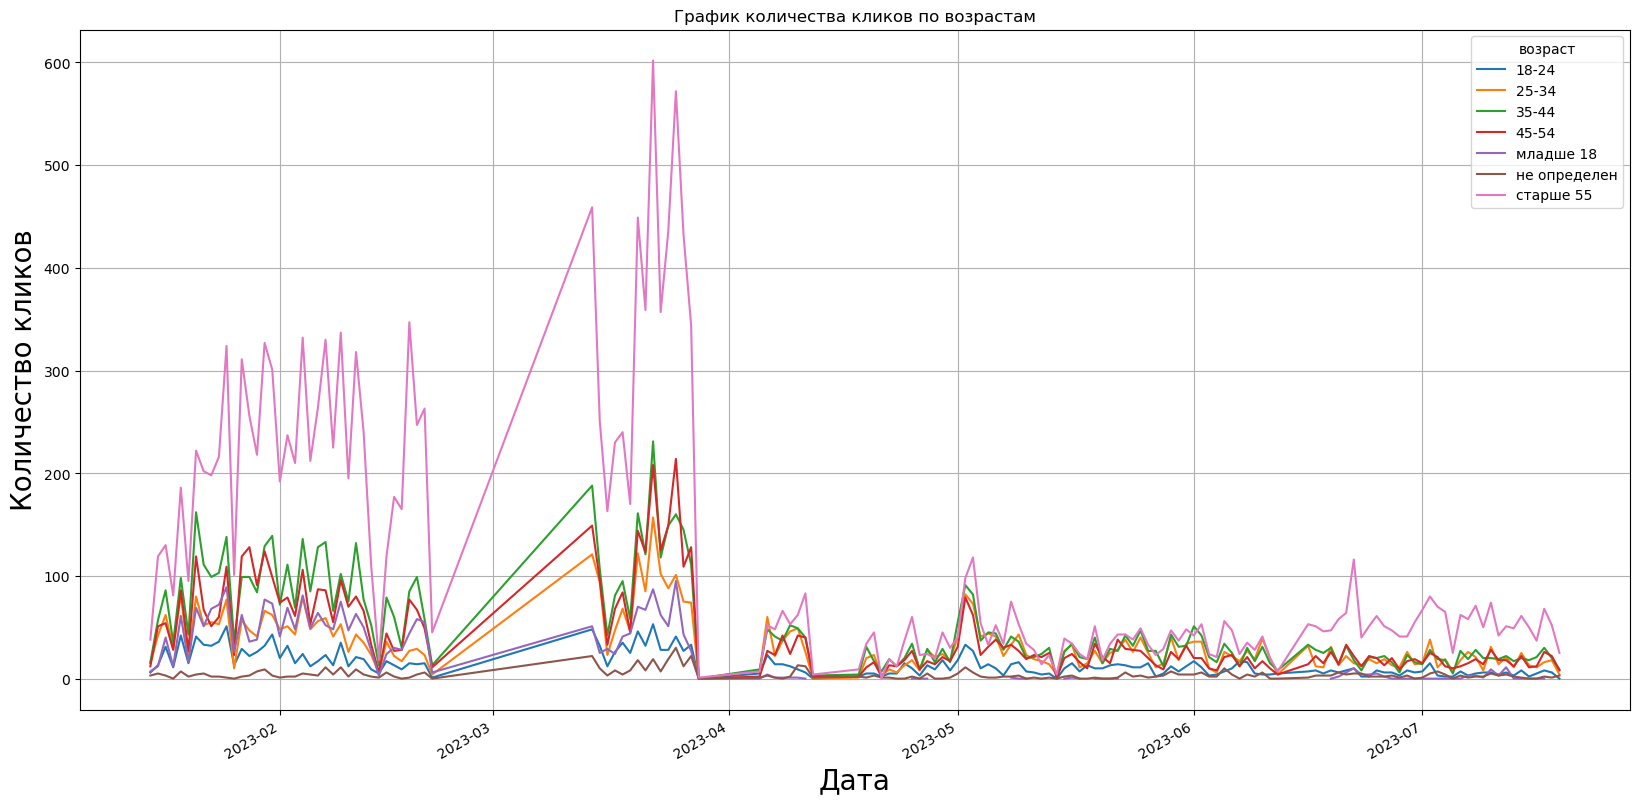

In [56]:
adgrants_last.pivot_table(
    index='дата',  
    columns='возраст', 
    values='клики',  
    aggfunc='sum'  
).sort_values(by='дата', ascending =False).plot(figsize=(20, 10), grid=True)
plt.title('График количества кликов по возрастам')
plt.xlabel('Дата', fontsize=20)
plt.ylabel('Количество кликов', fontsize=20)
plt.show()

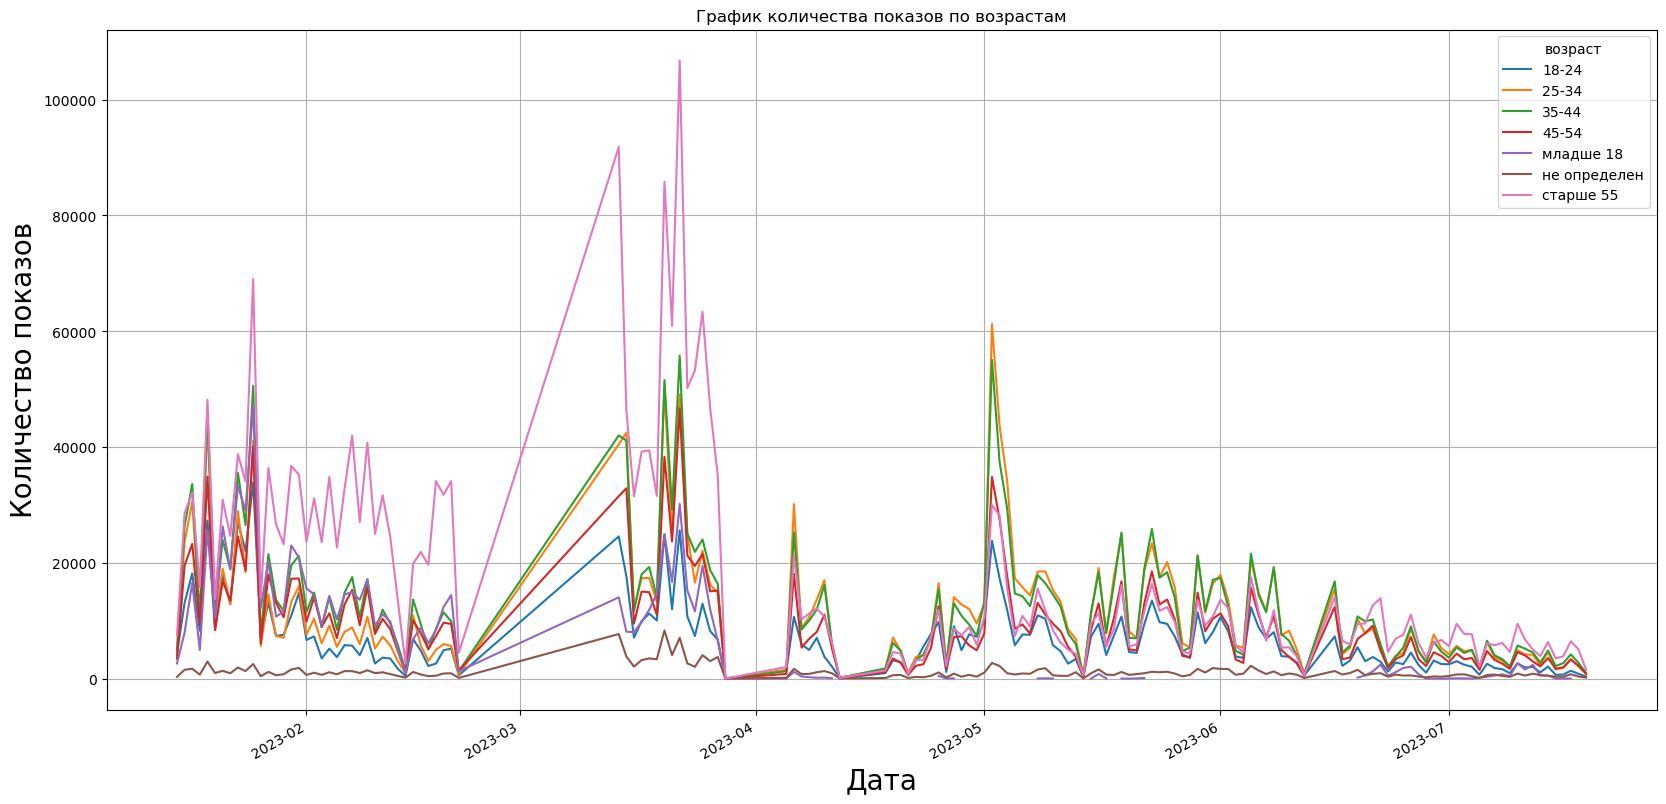

In [57]:
adgrants_last.pivot_table(
    index='дата',  
    columns='возраст', 
    values='показы',  
    aggfunc='sum'  
).plot(figsize=(20, 10), grid=True)
plt.title('График количества показов по возрастам')
plt.xlabel('Дата', fontsize=20)
plt.ylabel('Количество показов', fontsize=20)
plt.show()

Больше всего людей в возрасте старше 55 смотрит рекламу и переходит по ней пик кликов и показов приходится на март месяц.

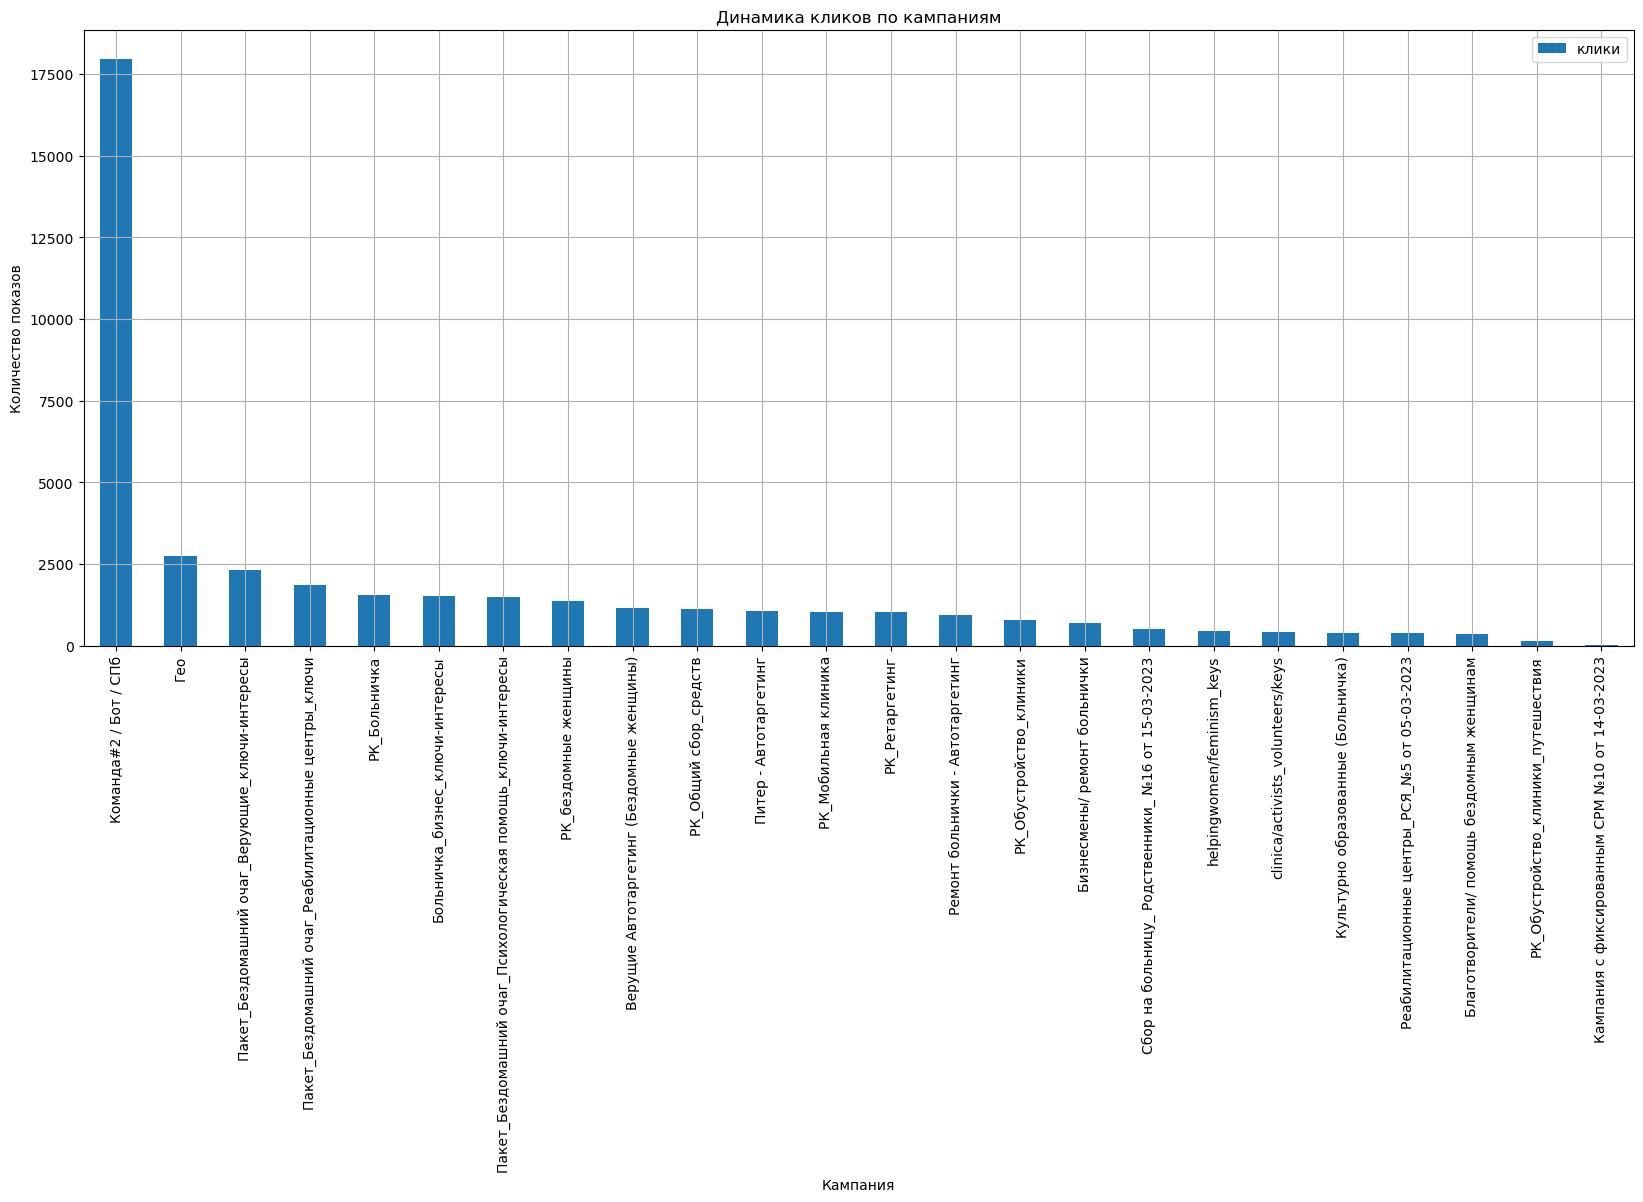

In [58]:
adgrants_time = adgrants_last.pivot_table(
    index='кампания',  
    values='клики',  
    aggfunc='sum'  
).sort_values(by='клики', ascending =False).plot(kind='bar', grid=True, figsize=(20,8))
plt.title('Динамика кликов по кампаниям')
plt.xlabel('Кампания')
plt.ylabel('Количество показов');

In [59]:
adgrants_time = adgrants_last.pivot_table(
    index='кампания',  
    values=['клики', 'показы'], 
    aggfunc={'клики':'sum', 'показы':'sum'}
).sort_values(by='клики', ascending =False)
adgrants_time

,клики,показы
кампания,,
Команда#2 / Бот / СПб,17963,3497029
Гео,2742,339894
Пакет_Бездомашний очаг_Верующие_ключи-интересы,2315,909860
Пакет_Бездомашний очаг_Реабилитационные центры_ключи,1867,505274
РК_Больничка,1557,867789
Больничка_бизнес_ключи-интересы,1524,623644
Пакет_Бездомашний очаг_Психологическая помощь_ключи-интересы,1481,458401
РК_бездомные женщины,1354,267718
Верущие Автотаргетинг (Бездомные женщины),1149,281337


## Выводы и рекомендации

Статистика пожертований с платформы mixplat:
- Минимальная сумма пожертвований через платформу mixplat: 10
- Максимальная сумма пожертвований через платформу mixplat: 55000
- Максимальная сумма пожертвований через платформу mixplat: 1723.2364779874215
- Общее количество пожертвований через платформу mixplat: 795
- Общая сумма пожертвований через платформу mixplat: 1369973

Статистика пожертований с сайта charityhospital.ru:
- Минимальная сумма пожертвований через сайт charityhospital.ru: 0
- Максимальная сумма пожертвований через сайт charityhospital.ru: 90000
- Максимальная сумма пожертвований через сайт charityhospital.ru: 1712.8902229845626
- Общее количество пожертвований через сайт charityhospital.ru: 1166
- Общая сумма пожертвований через сайт charityhospital.ru: 1997230

Всего с двух платформ собрано 3367203 руб.

Наибольшее количество пожертвований приходит с России из Санкт-Петербурга, наименьшее с Польши и региона Флеволанд.  
Всего 648 разовый жертвующих и 147 кто постоянно отправляет пожертования.  
Больше всего неравнодушных людей в возрасте старше 55 смотрит рекламу и переходит по ней пик кликов и показов приходится на март месяц, когда была запущена компания `Команда #2/Бот/СПб`. 

Наибольший охват получили кампании:  
- Команда #2/Бот/СПб - 17963 кликов и 3497029 показов 
- Гео- 2742 кликов и 339894 показов 
- Пакет_Бездомашний очаг_Верующие_ключи-интересы- 2315 кликов и 909860 показов  
Наименьшие охваты:
- Благотворители/ помощь бездомным женщинам - 348 кликов и 127204 показов
- РК_Обустройство_клиники_путешествия - 143 кликов и 33246 показов
- Кампания с фиксированным СРМ №10 от 14-03-2023 всего лишь 4 клика и 7348 показов.

В целом компании по СПБ и гео работают, но возможно больше всего пожертвований приходит из Санкт-Петербурга только из-за того, что больница находится в этом городе. 


Презентация https://drive.google.com/file/d/1beEJRIREm9NWQqK_iW9i_cT9smR1z7TD/view?usp=sharing